In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
df = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
df.set_index('Id', inplace = True)
test.set_index('Id', inplace = True)

In [4]:
df.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2051 non-null   int64  
 1   MS SubClass      2051 non-null   int64  
 2   MS Zoning        2051 non-null   object 
 3   Lot Frontage     1721 non-null   float64
 4   Lot Area         2051 non-null   int64  
 5   Street           2051 non-null   object 
 6   Alley            140 non-null    object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual     20

In [6]:
df.isnull().sum()

PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
Lot Area          0
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 80, dtype: int64

## Make a Heatmap of all int and floats ingnore the object ones for now

#### There are nulls in Garage check if those make sense against garage quality. If garage quality is NaN it means there is no garage so garage area and garage cars can just be 0

In [7]:
df[df['Garage Area'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2237,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [8]:
df[(df['Garage Area'].isnull()) & (df['Garage Cars'].isnull())][['Garage Area', 'Garage Cars', 'Garage Qual']]

,Garage Area,Garage Cars,Garage Qual
Id,,,
2237,NaN,NaN,NaN


In [9]:
df[df['Garage Area'] == 0]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2243,911103060,190,C (all),75.0,8250,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,WD,119600
330,923226250,160,RM,21.0,1476,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,76000
2278,923202134,20,RL,70.0,8402,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2007,New,147000
2235,910201050,50,RM,50.0,7288,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2007,WD,129850
2084,905476170,30,RL,58.0,9098,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,86000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,923204150,90,RL,94.0,9400,Pave,NaN,Reg,Low,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,139000
2880,911175410,30,C (all),69.0,12366,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,51689
2628,535456010,90,RL,75.0,8512,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,119000


In [10]:
df[['Garage Area', 'Garage Cars']] = df[['Garage Area', 'Garage Cars']].replace({np.nan: 0})
test[['Garage Area', 'Garage Cars']] = test[['Garage Area', 'Garage Cars']].replace({np.nan: 0})
df[(df['Garage Area']== 0) & (df['Garage Cars'] == 0)][['Garage Area', 'Garage Cars', 'Garage Qual']]

,Garage Area,Garage Cars,Garage Qual
Id,,,
2243,0.0,0.0,NaN
330,0.0,0.0,NaN
2278,0.0,0.0,NaN
2235,0.0,0.0,NaN
2084,0.0,0.0,NaN
...,...,...,...
325,0.0,0.0,NaN
2880,0.0,0.0,NaN
2628,0.0,0.0,NaN


## There are many NaNs in columns that if the NaN was 0 would just indicate that there is none of whatever is NaN

#### Mas Vnr Type NaN means there is none so in the area those NaNs can be 0

In [11]:
df[(df['Mas Vnr Type'].isnull()) & (df['Mas Vnr Area'].isnull())][['Mas Vnr Area', 'Mas Vnr Type']]

,Mas Vnr Area,Mas Vnr Type
Id,,
2393,NaN,NaN
2383,NaN,NaN
539,NaN,NaN
518,NaN,NaN
2824,NaN,NaN
1800,NaN,NaN
1455,NaN,NaN
1120,NaN,NaN
1841,NaN,NaN


In [12]:
df['Mas Vnr Area'] = df[['Mas Vnr Area']].replace({np.nan: 0})
test['Mas Vnr Area'] = test[['Mas Vnr Area']].replace({np.nan: 0})

#### Basment finish type NaN means no basement so change all NaNs in surface areas to 0. Same with half and full bath

In [13]:
df[(df['BsmtFin SF 1'].isnull()) & (df['BsmtFin Type 1'].isnull())][['BsmtFin SF 1', 'BsmtFin Type 1']]

,BsmtFin SF 1,BsmtFin Type 1
Id,,
1342,NaN,NaN


In [14]:
df[['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']] = df[['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']].replace({np.nan: 0})
test[['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']] = test[['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']].replace({np.nan: 0})

## Make a new column which is just the total surface area of the house and lot

In [15]:
df['totalsf'] = df['Pool Area']+df['Wood Deck SF']+ df['Open Porch SF']+df['Lot Area']+df['Enclosed Porch']+df['3Ssn Porch']+ df['Screen Porch']+df['Total Bsmt SF']+df['Gr Liv Area']+df['Garage Area']
test['totalsf'] = test['Pool Area']+test['Wood Deck SF']+ test['Open Porch SF']+test['Lot Area']+test['Enclosed Porch']+test['3Ssn Porch']+ test['Screen Porch']+test['Total Bsmt SF']+test['Gr Liv Area']+test['Garage Area']

## I know that housing style and Building type should have an effect on Sale Price so lets see if there are outliers

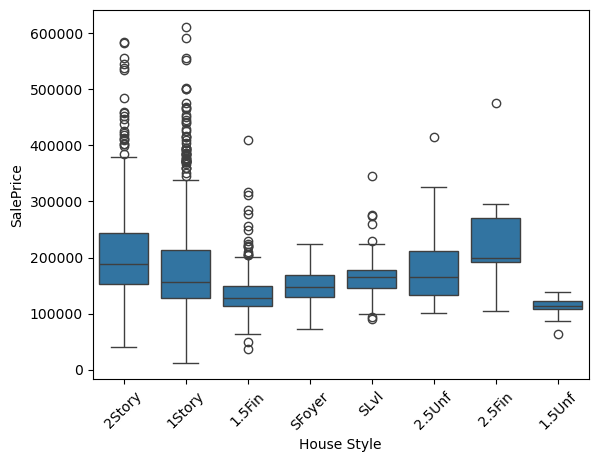

In [16]:
sns.boxplot(x='House Style', y='SalePrice', data=df)
plt.xticks(rotation=45);

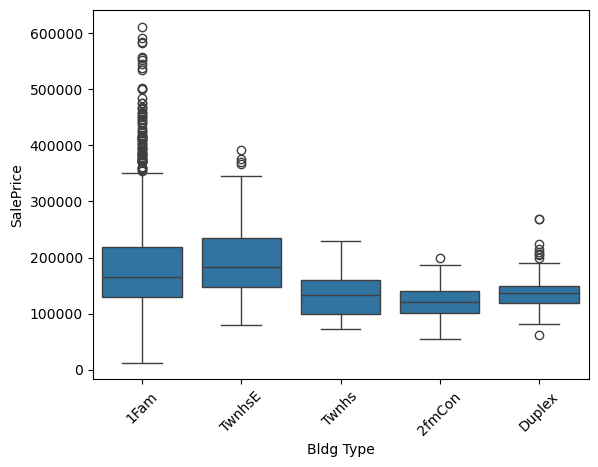

In [17]:
sns.boxplot(x='Bldg Type', y='SalePrice', data=df)
plt.xticks(rotation=45);

## Make Heat map of all int or float values and correlate then show only sale price correlation

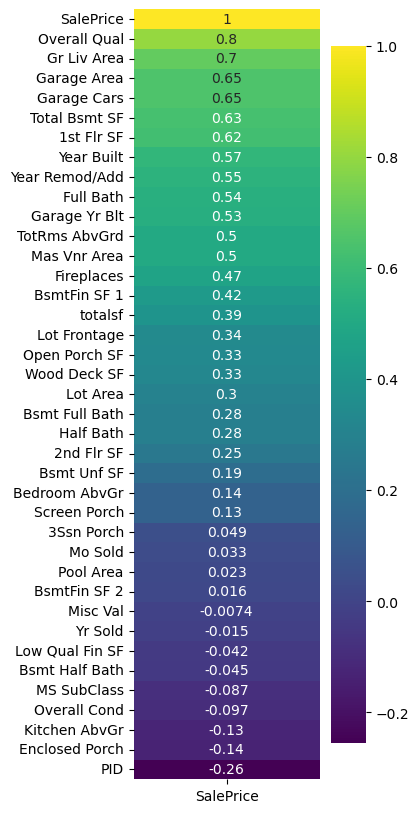

In [18]:
# df_numeric = df[['Mo Sold','Yr Sold','SalePrice','Screen Porch','Pool Area','3Ssn Porch',
#                  'Enclosed Porch','Open Porch SF','Wood Deck SF','Id','PID','MS SubClass',
#                  'Lot Area','Overall Qual','Overall Cond','Year Built','Year Remod/Add',
#                 'Mas Vnr Area','1st Flr SF','2nd Flr SF','Low Qual Fin SF','BsmtFin SF 1',
#                 'BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Gr Liv Area','Full Bath','Half Bath',
#                 'Kitchen AbvGr','Bedroom AbvGr','TotRms AbvGrd','Fireplaces','Garage Area','Garage Cars','Garage Yr Blt','Bsmt Half Bath','Bsmt Full Bath']]

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=['int', 'float'])

# Create the heatmap
plt.figure(figsize=(3, 10))
sns.heatmap(df_numeric.corr()[['SalePrice']].sort_values(by='SalePrice',ascending = False), 
            annot=True,
            cmap='viridis');

#### Looking at this heat map Overall Condition and MS SubClass should correlate more with sale price. The MS SubClass are designation numbers so dummy variables need to be made where as the Overall Conidtion needs to be looked at more throughly.

In [19]:
# Drop the original column and join the dummies
df = pd.get_dummies(df, 
                    columns = ['MS SubClass'],
                    prefix = 'mssubclass',
                    dtype = int)
df.columns

Index(['PID', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars'

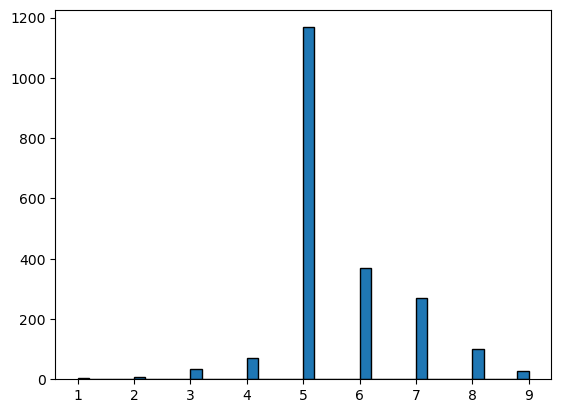

In [20]:
plt.hist(df['Overall Cond'],
        bins = 40,
        edgecolor = 'black');

#### Performed get dummies on MS SubClass to get better correlation and looked at the distribution of Overall condition to see if there was any heavy skewing. It appear the histogram is sleft skewed but is centered on 5 which is corresponds to average. This would mean other factors influcence sale price more and that the overall condition data is fine as is

## Missed Lot Frontage in my original sweep. NaN means there is no linear feet of street connected to the property so change to 0 

In [21]:
df['Lot Frontage'] = df[['Lot Frontage']].replace({np.nan: 0})
test['Lot Frontage'] = test[['Lot Frontage']].replace({np.nan: 0})

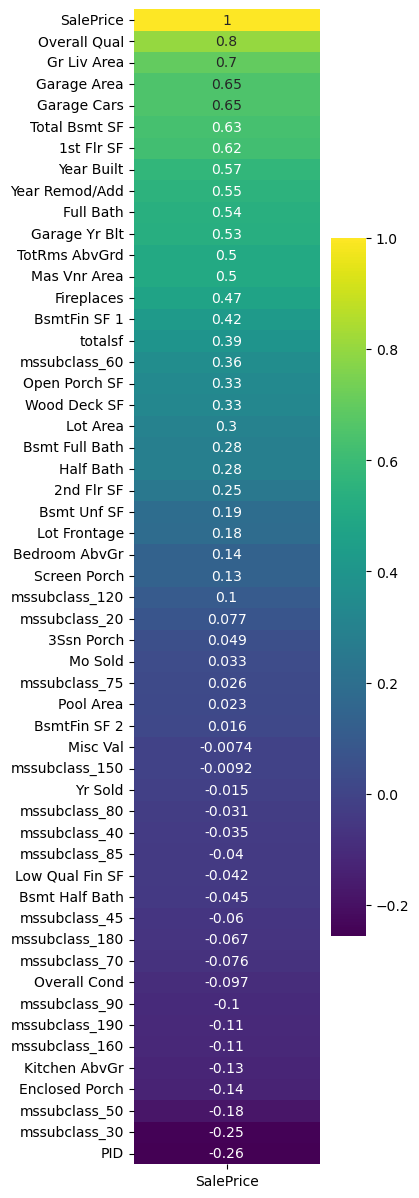

In [22]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=['int', 'float'])

# Create the heatmap
plt.figure(figsize=(3, 15))
sns.heatmap(df_numeric.corr()[['SalePrice']].sort_values(by='SalePrice',ascending = False), 
            annot=True,
            cmap='viridis');

#### Replotted heat map with fixed subclass 

## Check Distribution of Sale Price and the Mean

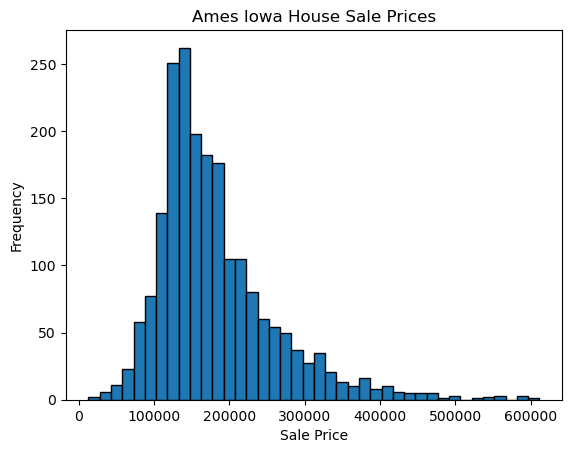

In [23]:
plt.hist(df['SalePrice'],
        bins = 40,
        edgecolor = 'black')
plt.title('Ames Iowa House Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency');

plt.savefig('Ames Iowa House Sale Prices')

In [24]:
np.mean(df['SalePrice'])

181469.70160897123

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2051 entries, 109 to 10
Data columns (total 96 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2051 non-null   int64  
 1   MS Zoning        2051 non-null   object 
 2   Lot Frontage     2051 non-null   float64
 3   Lot Area         2051 non-null   int64  
 4   Street           2051 non-null   object 
 5   Alley            140 non-null    object 
 6   Lot Shape        2051 non-null   object 
 7   Land Contour     2051 non-null   object 
 8   Utilities        2051 non-null   object 
 9   Lot Config       2051 non-null   object 
 10  Land Slope       2051 non-null   object 
 11  Neighborhood     2051 non-null   object 
 12  Condition 1      2051 non-null   object 
 13  Condition 2      2051 non-null   object 
 14  Bldg Type        2051 non-null   object 
 15  House Style      2051 non-null   object 
 16  Overall Qual     2051 non-null   int64  
 17  Overall Cond     20

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 878 entries, 2658 to 1939
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              878 non-null    int64  
 1   MS SubClass      878 non-null    int64  
 2   MS Zoning        878 non-null    object 
 3   Lot Frontage     878 non-null    float64
 4   Lot Area         878 non-null    int64  
 5   Street           878 non-null    object 
 6   Alley            58 non-null     object 
 7   Lot Shape        878 non-null    object 
 8   Land Contour     878 non-null    object 
 9   Utilities        878 non-null    object 
 10  Lot Config       878 non-null    object 
 11  Land Slope       878 non-null    object 
 12  Neighborhood     878 non-null    object 
 13  Condition 1      878 non-null    object 
 14  Condition 2      878 non-null    object 
 15  Bldg Type        878 non-null    object 
 16  House Style      878 non-null    object 
 17  Overall Qual     

## Fix up Test dataframe to match Training Dataframe 

In [27]:
# fixing MS SubClass to match training data
test = pd.get_dummies(test, 
                    columns = ['MS SubClass'],
                    prefix = 'mssubclass',
                    dtype = int)
test.columns

Index(['PID', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars'

## Make a Model and test

In [28]:
X = df[['PID', 'Overall Qual', 'Gr Liv Area', 'Year Built', 'Garage Area', 'Total Bsmt SF', 'Year Remod/Add', 'TotRms AbvGrd', 'Lot Area','mssubclass_30','BsmtFin SF 1']]
y = df['SalePrice']

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)
lr = LinearRegression()
lr.fit(X_train,y_train)

lr.score(X_train,y_train)

0.7893794432237293

In [30]:
lr.score(X_test,y_test)

0.8505024840716063

## Check the residuals

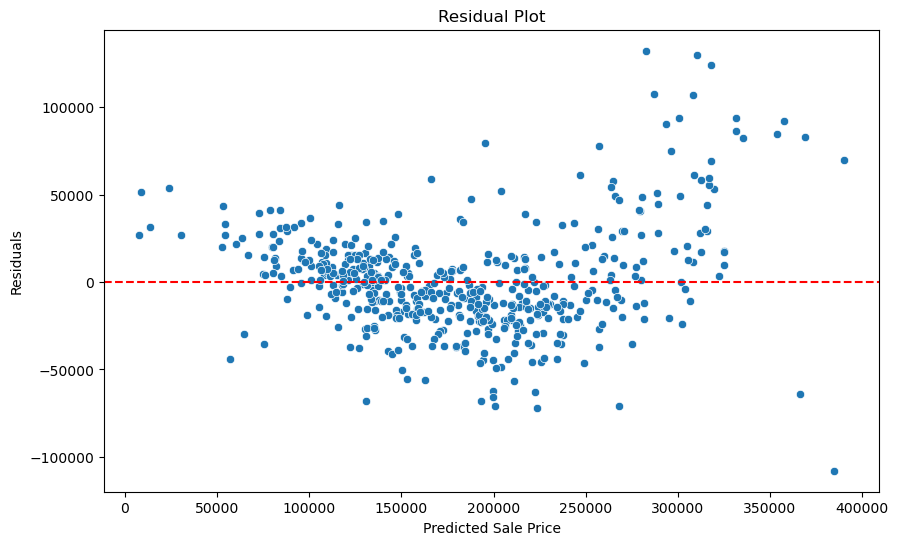

In [31]:
y_pred = lr.predict(X_test)
residuals = y_test - y_pred

# Create residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residual Plot');

In [32]:
metrics.mean_squared_error(y_test,y_pred)

917918444.9203876

#### My model is neither under or overfit based on the R^2 score. I believe it is in the sweet spot

## Refit model to all of the data

In [33]:
lr.fit(X,y)

LinearRegression()

In [34]:
preds = lr.predict(test[['PID', 'Overall Qual', 'Gr Liv Area', 'Year Built', 'Garage Area', 'Total Bsmt SF', 'Year Remod/Add', 'TotRms AbvGrd', 'Lot Area','mssubclass_30','BsmtFin SF 1']])
predictions = test.copy()
predictions['SalePrice'] = preds
predictions = predictions[['SalePrice']]
predictions.head()

,SalePrice
Id,
2658,159964.951335
2718,186283.706067
2414,218953.168536
1989,129146.473547
625,176334.962543


## Check Histogram to make sure the predicted prices somewhat match the training set sale price histogram

(array([ 1.,  2.,  2.,  2.,  6., 13.,  9., 20., 27., 58., 75., 77., 50.,
        65., 63., 52., 48., 59., 45., 35., 33., 33., 20., 22., 13.,  9.,
        10., 11.,  3.,  1.,  6.,  2.,  0.,  1.,  1.,  0.,  2.,  0.,  1.,
         1.]),
 array([ -6435.45319723,   5743.54999204,  17922.5531813 ,  30101.55637057,
         42280.55955983,  54459.5627491 ,  66638.56593837,  78817.56912763,
         90996.5723169 , 103175.57550616, 115354.57869543, 127533.5818847 ,
        139712.58507396, 151891.58826323, 164070.5914525 , 176249.59464176,
        188428.59783103, 200607.60102029, 212786.60420956, 224965.60739883,
        237144.61058809, 249323.61377736, 261502.61696662, 273681.62015589,
        285860.62334516, 298039.62653442, 310218.62972369, 322397.63291296,
        334576.63610222, 346755.63929149, 358934.64248075, 371113.64567002,
        383292.64885929, 395471.65204855, 407650.65523782, 419829.65842708,
        432008.66161635, 444187.66480562, 456366.66799488, 468545.67118415,
      

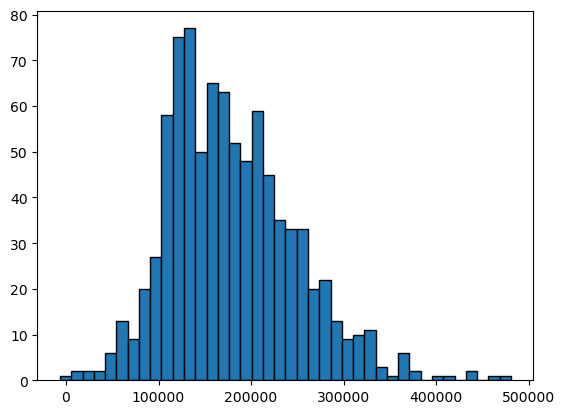

In [35]:
plt.hist(predictions['SalePrice'],
        bins = 40,
        edgecolor = 'black')


## Send these predictions to kaggle 

In [36]:
predictions.to_csv('only_numeric_predictions.csv')
# this got about a 30k score. While I have no clue what that means I'll assume that is bad since just the overall condition column got a 50k score

## Clean up the rest of the dataframe

#### Alley has a lot of null values. They are refering to no alley acess so change NaN to none.

In [37]:
df[['Alley']] = df[['Alley']].replace({np.nan: 'None'})
test[['Alley']] = test[['Alley']].replace({np.nan: 'None'})

#### Fix Garage type and Finish to get rid of NaN

In [38]:
df[['Garage Type','Garage Finish']] = df[['Garage Type','Garage Finish']].replace({np.nan:'None'})
test[['Garage Type','Garage Finish']] = test[['Garage Type','Garage Finish']].replace({np.nan:'None'})

#### Fix up Mas Vnr Type. Null value means None

In [39]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].replace({np.nan:'None'})
test['Mas Vnr Type'] = test['Mas Vnr Type'].replace({np.nan:'None'})

#### Fix Basement Finish to get rid of NaN

In [40]:
df[['BsmtFin Type 1','BsmtFin Type 2']] = df[['BsmtFin Type 1','BsmtFin Type 2']].replace({np.nan:'None'})
test[['BsmtFin Type 1','BsmtFin Type 2']] = test[['BsmtFin Type 1','BsmtFin Type 2']].replace({np.nan:'None'})

#### Fix Null values in Misc Feature

In [41]:
df['Misc Feature'] = df['Misc Feature'].replace({np.nan:'None'})
test['Misc Feature'] = test['Misc Feature'].replace({np.nan:'None'})

#### Change basement qual to a 0-5 scale

In [42]:
df['Bsmt Qual'] = df[['Bsmt Qual']].replace({'Ex':5,
                                               'Gd':4,
                                               'TA':3,
                                               'Fa':2,
                                               'Po':1,
                                               np.nan: 0})
test['Bsmt Qual'] = test[['Bsmt Qual']].replace({'Ex':5,
                                               'Gd':4,
                                               'TA':3,
                                               'Fa':2,
                                               'Po':1,
                                               np.nan: 0})

C:\Users\graha\AppData\Local\Temp\ipykernel_8320\891386768.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Bsmt Qual'] = df[['Bsmt Qual']].replace({'Ex':5,
C:\Users\graha\AppData\Local\Temp\ipykernel_8320\891386768.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Bsmt Qual'] = test[['Bsmt Qual']].replace({'Ex':5,


#### Change basement qual to 0-5 sacle

In [43]:
df['Bsmt Cond'] = df[['Bsmt Cond']].replace({'Ex':5,
                                               'Gd':4,
                                               'TA':3,
                                               'Fa':2,
                                               'Po':1,
                                               np.nan: 0})
test['Bsmt Cond'] = test[['Bsmt Cond']].replace({'Ex':5,
                                               'Gd':4,
                                               'TA':3,
                                               'Fa':2,
                                               'Po':1,
                                               np.nan: 0})

C:\Users\graha\AppData\Local\Temp\ipykernel_8320\1911676731.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Bsmt Cond'] = df[['Bsmt Cond']].replace({'Ex':5,
C:\Users\graha\AppData\Local\Temp\ipykernel_8320\1911676731.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Bsmt Cond'] = test[['Bsmt Cond']].replace({'Ex':5,


#### Change exter Qual and Cond to a 1-5 scale

In [44]:
df[['Exter Qual','Exter Cond']] = df[['Exter Qual','Exter Cond']].replace({'Ex':5,
                                               'Gd':4,
                                               'TA':3,
                                               'Fa':2,
                                               'Po':1})
test[['Exter Qual','Exter Cond']] = test[['Exter Qual','Exter Cond']].replace({'Ex':5,
                                               'Gd':4,
                                               'TA':3,
                                               'Fa':2,
                                               'Po':1})

C:\Users\graha\AppData\Local\Temp\ipykernel_8320\2588255011.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['Exter Qual','Exter Cond']] = df[['Exter Qual','Exter Cond']].replace({'Ex':5,
C:\Users\graha\AppData\Local\Temp\ipykernel_8320\2588255011.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test[['Exter Qual','Exter Cond']] = test[['Exter Qual','Exter Cond']].replace({'Ex':5,


#### Change Basement Exposure to a 0-4 scale since there is no excellent exposure but there is a good exposure

In [45]:
df['Bsmt Exposure'] = df[['Bsmt Exposure']].replace({
                                               'Gd':4,
                                               'Av':3,
                                               'Mn':2,
                                               'No':1,
                                               np.nan: 0})
test['Bsmt Exposure'] = test[['Bsmt Exposure']].replace({
                                               'Gd':4,
                                               'Av':3,
                                               'Mn':2,
                                               'No':1,
                                               np.nan: 0})

C:\Users\graha\AppData\Local\Temp\ipykernel_8320\1128994399.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Bsmt Exposure'] = df[['Bsmt Exposure']].replace({
C:\Users\graha\AppData\Local\Temp\ipykernel_8320\1128994399.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Bsmt Exposure'] = test[['Bsmt Exposure']].replace({


#### Change Heating QC and Kintech Qual to 1-5 Scale

In [46]:
df[['Heating QC','Kitchen Qual']] = df[['Heating QC','Kitchen Qual']].replace({'Ex':5,
                                               'Gd':4,
                                               'TA':3,
                                               'Fa':2,
                                               'Po':1})
test[['Heating QC','Kitchen Qual']] = test[['Heating QC','Kitchen Qual']].replace({'Ex':5,
                                               'Gd':4,
                                               'TA':3,
                                               'Fa':2,
                                               'Po':1})

C:\Users\graha\AppData\Local\Temp\ipykernel_8320\3369265959.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['Heating QC','Kitchen Qual']] = df[['Heating QC','Kitchen Qual']].replace({'Ex':5,
C:\Users\graha\AppData\Local\Temp\ipykernel_8320\3369265959.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test[['Heating QC','Kitchen Qual']] = test[['Heating QC','Kitchen Qual']].replace({'Ex':5,


#### Change Fireplace Qual, Garage Qual and condition to 0-5 Scale

In [47]:
df[['Fireplace Qu','Garage Qual','Garage Cond']] = df[['Fireplace Qu','Garage Qual','Garage Cond']].replace({'Ex':5,
                                               'Gd':4,
                                               'TA':3,
                                               'Fa':2,
                                               'Po':1,
                                               np.nan: 0})
test[['Fireplace Qu','Garage Qual','Garage Cond']] = test[['Fireplace Qu','Garage Qual','Garage Cond']].replace({'Ex':5,
                                               'Gd':4,
                                               'TA':3,
                                               'Fa':2,
                                               'Po':1,
                                               np.nan: 0})

C:\Users\graha\AppData\Local\Temp\ipykernel_8320\338507733.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['Fireplace Qu','Garage Qual','Garage Cond']] = df[['Fireplace Qu','Garage Qual','Garage Cond']].replace({'Ex':5,
C:\Users\graha\AppData\Local\Temp\ipykernel_8320\338507733.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test[['Fireplace Qu','Garage Qual','Garage Cond']] = test[['Fireplace Qu','Garage Qual','Garage Cond']].replace({'Ex':5,


#### Change Pool Quality to 0-4 Scale

In [48]:
df['Pool QC'] = df[['Pool QC']].replace({'Ex':4,
                                               'Gd':3,
                                               'TA':2,
                                               'Fa':1,
                                               np.nan: 0})
test['Pool QC'] = test[['Pool QC']].replace({'Ex':4,
                                               'Gd':3,
                                               'TA':2,
                                               'Fa':1,
                                               np.nan: 0})

C:\Users\graha\AppData\Local\Temp\ipykernel_8320\168909383.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Pool QC'] = df[['Pool QC']].replace({'Ex':4,
C:\Users\graha\AppData\Local\Temp\ipykernel_8320\168909383.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Pool QC'] = test[['Pool QC']].replace({'Ex':4,


## Write a function to get dummies and then get the dummies

In [49]:
def make_dummies(df,test,column):
    df = pd.get_dummies(df, 
                        columns = [column],
                        prefix = column.strip(),
                        dtype = int)
    test = pd.get_dummies(test, 
                        columns=[column], 
                        prefix=column.strip(), 
                        dtype=int)

    return df, test

Let's be excessive

In [50]:
df, test = make_dummies(df,test,'MS Zoning')
df, test = make_dummies(df,test,'Street')
df, test = make_dummies(df,test,'Alley')
df, test = make_dummies(df,test,'Lot Shape')
df, test = make_dummies(df,test,'Land Contour')
df, test = make_dummies(df,test,'Lot Config')
df, test = make_dummies(df,test,'Land Slope')
df, test = make_dummies(df,test,'Neighborhood')
df, test = make_dummies(df,test,'Condition 1')
df, test = make_dummies(df,test,'Condition 2')
df, test = make_dummies(df,test,'Bldg Type')
df, test = make_dummies(df,test,'House Style')
df, test = make_dummies(df,test,'Roof Style')
df, test = make_dummies(df,test,'Roof Matl')
df, test = make_dummies(df,test,'Exterior 1st')
df, test = make_dummies(df,test,'Exterior 2nd')
df, test = make_dummies(df,test,'Mas Vnr Type')
df, test = make_dummies(df,test,'Foundation')
df, test = make_dummies(df,test,'BsmtFin Type 1')
df, test = make_dummies(df,test,'BsmtFin Type 2')
df, test = make_dummies(df,test,'Heating')
df, test = make_dummies(df,test,'Central Air')
df, test = make_dummies(df,test,'Electrical')
df, test = make_dummies(df,test,'Functional')
df, test = make_dummies(df,test,'Garage Type')
df, test = make_dummies(df,test,'Garage Finish')
df, test = make_dummies(df,test,'Paved Drive')
df, test = make_dummies(df,test,'Fence')
df, test = make_dummies(df,test,'Sale Type')
df, test = make_dummies(df,test,'Misc Feature')
df, test = make_dummies(df,test,'Utilities')

## Make a Heatmap for the df dataframe against SalePrice

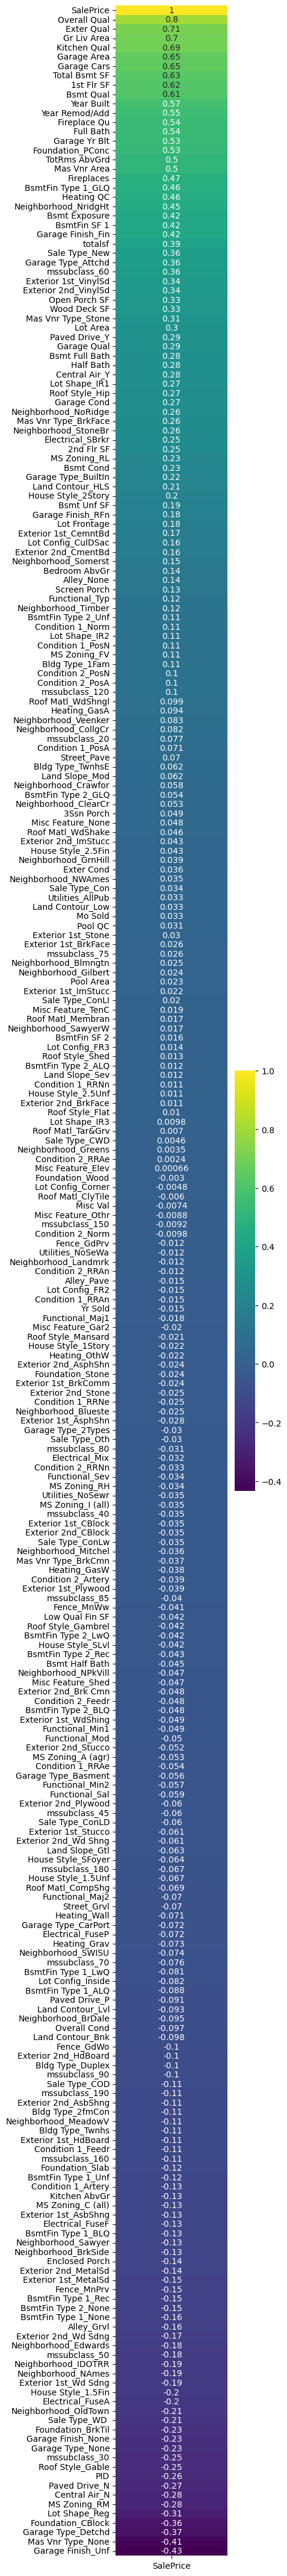

In [51]:
plt.figure(figsize=(3, 55))
sns.heatmap(df.corr()[['SalePrice']].sort_values(by='SalePrice',ascending = False), 
            annot=True,
            cmap='viridis');

In [52]:
df.info(verbose = True,
       show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Index: 2051 entries, 109 to 10
Data columns (total 273 columns):
 #    Column                Non-Null Count  Dtype  
---   ------                --------------  -----  
 0    PID                   2051 non-null   int64  
 1    Lot Frontage          2051 non-null   float64
 2    Lot Area              2051 non-null   int64  
 3    Overall Qual          2051 non-null   int64  
 4    Overall Cond          2051 non-null   int64  
 5    Year Built            2051 non-null   int64  
 6    Year Remod/Add        2051 non-null   int64  
 7    Mas Vnr Area          2051 non-null   float64
 8    Exter Qual            2051 non-null   int64  
 9    Exter Cond            2051 non-null   int64  
 10   Bsmt Qual             2051 non-null   float64
 11   Bsmt Cond             2051 non-null   float64
 12   Bsmt Exposure         2051 non-null   float64
 13   BsmtFin SF 1          2051 non-null   float64
 14   BsmtFin SF 2          2051 non-null   float64
 15   Bsmt Un

## Lets see a model with greater than 0.2 and less than -0.2 correlation

In [53]:
correlations = df.corr()['SalePrice']
selected_columns = correlations[(correlations >0.2)|(correlations <-0.2)].index
selected_columns = selected_columns.drop(['SalePrice', 'Garage Yr Blt'])
X = df[selected_columns]
y = df['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)
lr = LinearRegression()
lr.fit(X_train,y_train)

lr.score(X_train,y_train)

0.8594443694348163

In [54]:
lr.score(X_test,y_test)

0.8779096735095399

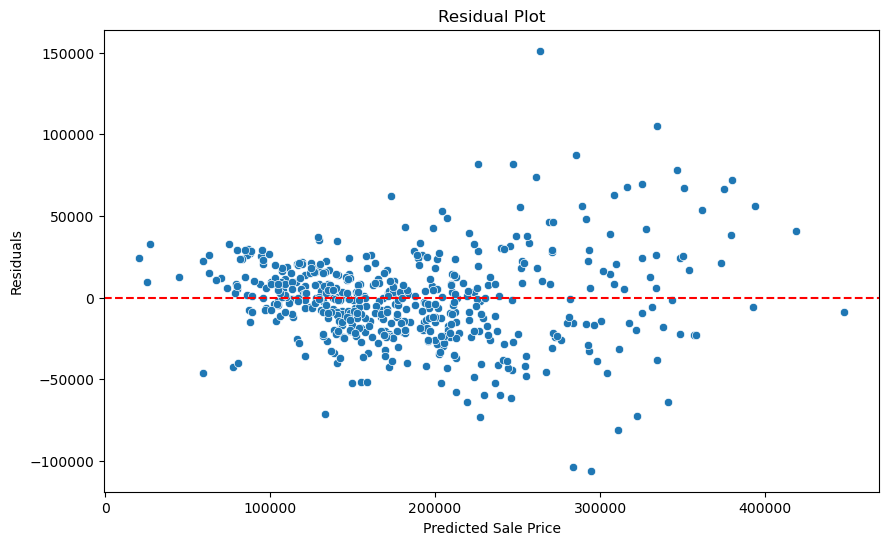

In [55]:
y_pred = lr.predict(X_test)
residuals = y_test - y_pred

# Create residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residual Plot');

In [56]:
metrics.mean_squared_error(y_test,y_pred)

749637623.9831598

In [57]:
lr.fit(X,y)
preds = lr.predict(test[selected_columns])
predictions = test.copy()
predictions['SalePrice'] = preds
predictions = predictions[['SalePrice']]
predictions.head()

,SalePrice
Id,
2658,111275.866225
2718,169635.081522
2414,232683.144212
1989,107527.336074
625,175705.314564


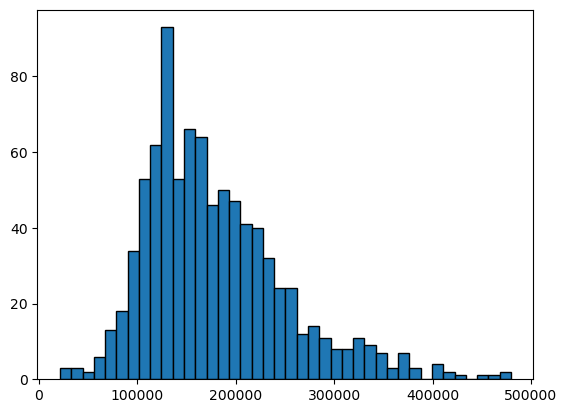

In [58]:
plt.hist(predictions['SalePrice'],
        bins = 40,
        edgecolor = 'black');

In [59]:
predictions.to_csv('Full_data_predictions_1.csv')

So this was ok for a Kaggle score and got me to 30K but it includes variables that are clearly linear with each other such as 1st and 2nd flr surface area with ground living area. It also includes PID which is just a mailing thing and should have no impact on a housing price since it is just an identifier for mail for the house.

# Make a good model 1

### What makes sense in the heatmap above?
* Garage area and number of cars
* The neighborhoods
* The ground living area
* The overall quality of the house
* The exterior quality
* The total surface area of the basement, its quality, and its exposure
* The Kitchen Quality
* The year the house was built and the year it was remodeled
* House type
* Does the house have a deck or a porch?
* Fireplaces

First let's make a dataframe that is less of a mess (or disaster) and easier to follow. Using only the things above

In [60]:
# found out through an error that ['Neighborhood_GrnHill', 'Neighborhood_Landmrk'] are not in the test data at all so let's make those columns and fill them in with 0s
test[['Neighborhood_GrnHill', 'Neighborhood_Landmrk']] = 0

In [61]:
keywords = [
    'Garage', 'BsmtFin Type 1_GLQ', 'House Style', 'Overall', 'Exter Qual',
    'Year', 'Exter Cond', 'Porch', 'Deck', 'Bldg', 'Fireplace', 'Gr Liv Area',
    'Total Bsmt SF', 'Bsmt Exposure', 'Bsmt Qual', 'Neighborhood'
]
def filter_columns_train_test(df_train, df_test, keywords):
   
    # Find columns that contain any of the keywords
    filtered_columns = [
        col for col in df_train.columns 
        if any(keyword in col for keyword in keywords)]
    
    # Filter the train and test DataFrames
    df_train_filtered = df_train[filtered_columns]
    df_test_filtered = df_test[filtered_columns]

    # Ensure 'Id' remains as the index (do not reset the index)
    # This is from chatgpt 
    df_train_filtered.index = df_train.index
    df_test_filtered.index = df_test.index
    
    return df_train_filtered, df_test_filtered
df_train_filtered, df_test_filtered = filter_columns_train_test(df, test, keywords)

Add SalePrice to training

In [62]:
df_train_filtered['SalePrice'] = df['SalePrice']

C:\Users\graha\AppData\Local\Temp\ipykernel_8320\1855545518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_filtered['SalePrice'] = df['SalePrice']


### Do not need Garage Yr Blt so drop in both training and test filtered dataframes

In [63]:
df_train_filtered.drop(columns = 'Garage Yr Blt', inplace = True)
df_test_filtered.drop(columns = 'Garage Yr Blt', inplace = True)

C:\Users\graha\AppData\Local\Temp\ipykernel_8320\152876224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_filtered.drop(columns = 'Garage Yr Blt', inplace = True)
C:\Users\graha\AppData\Local\Temp\ipykernel_8320\152876224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_filtered.drop(columns = 'Garage Yr Blt', inplace = True)


In [64]:
df_train_filtered.columns = df_train_filtered.columns.str.lower().str.replace(' ','_')
df_test_filtered.columns = df_test_filtered.columns.str.lower().str.replace(' ','_')

Let's engineer some columns

In [65]:
df_train_filtered['has_porch'] = df_train_filtered['enclosed_porch'] + df_train_filtered['3ssn_porch'] + df_train_filtered['screen_porch']
df_train_filtered['garage_capacity'] = df_train_filtered['garage_area'] * df_train_filtered['garage_cars']
df_train_filtered['age'] = 2010 - df_train_filtered['year_built']
df_train_filtered['years_since_remod'] = df_train_filtered['year_remod/add'] - df_train_filtered['year_built']
df_train_filtered['total_quality'] = df_train_filtered['overall_qual'] * df_train_filtered['overall_cond']

df_test_filtered['has_porch'] = df_test_filtered['enclosed_porch'] + df_test_filtered['3ssn_porch'] + df_test_filtered['screen_porch']
df_test_filtered['garage_capacity'] = df_test_filtered['garage_area'] * df_test_filtered['garage_cars']
df_test_filtered['age'] = 2010 - df_test_filtered['year_built']
df_test_filtered['years_since_remod'] = df_test_filtered['year_remod/add'] - df_test_filtered['year_built']
df_test_filtered['total_quality'] = df_test_filtered['overall_qual'] * df_test_filtered['overall_cond']

C:\Users\graha\AppData\Local\Temp\ipykernel_8320\436734031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_filtered['has_porch'] = df_train_filtered['enclosed_porch'] + df_train_filtered['3ssn_porch'] + df_train_filtered['screen_porch']
C:\Users\graha\AppData\Local\Temp\ipykernel_8320\436734031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_filtered['garage_capacity'] = df_train_filtered['garage_area'] * df_train_filtered['garage_cars']
C:\Users\graha\AppData\Local\Temp\ipykernel_

In [66]:
df_train_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   overall_qual          2051 non-null   int64  
 1   overall_cond          2051 non-null   int64  
 2   year_built            2051 non-null   int64  
 3   year_remod/add        2051 non-null   int64  
 4   exter_qual            2051 non-null   int64  
 5   exter_cond            2051 non-null   int64  
 6   bsmt_qual             2051 non-null   float64
 7   bsmt_exposure         2051 non-null   float64
 8   total_bsmt_sf         2051 non-null   float64
 9   gr_liv_area           2051 non-null   int64  
 10  fireplaces            2051 non-null   int64  
 11  fireplace_qu          2051 non-null   float64
 12  garage_cars           2051 non-null   float64
 13  garage_area           2051 non-null   float64
 14  garage_qual           2051 non-null   float64
 15  garage_cond           2051

### Let's see corr for new columns

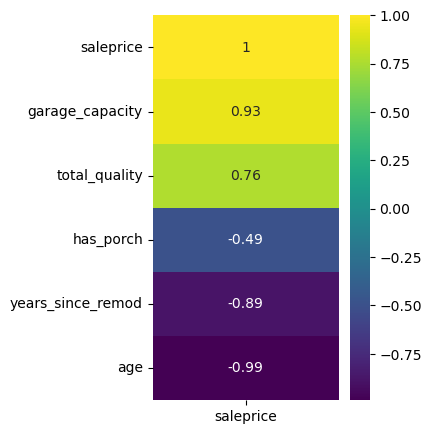

In [67]:
plt.figure(figsize=(3, 5))
corr_matrix = df_train_filtered[['has_porch', 'garage_capacity', 'saleprice','age', 'total_quality','years_since_remod']].corr()
sns.heatmap(corr_matrix.corr()[['saleprice']].sort_values(by='saleprice',ascending = False), 
            annot=True,
            cmap='viridis');

Let's get rid of some linear columns

In [68]:
columns_to_drop = [
    'enclosed_porch', '3ssn_porch', 'screen_porch',  # since I have have has_porch
    'garage_area', 'garage_cars',  # since I have have garage_capacity
    'year_built', # since I have age
    'overall_qual', 'overall_cond', # since I have total quality
    # Drop one category from each categorical variable to avoid dummy trap
    'bldg_type_1fam',  
    'house_style_1story',
    'garage_type_2types',
]

df_train_filtered = df_train_filtered.drop(columns=columns_to_drop)
df_test_filtered = df_test_filtered.drop(columns=columns_to_drop)

Fit and test the model and also change the surface area to be log as well as the predictions

In [69]:
X = df_train_filtered.drop(columns = 'saleprice')
y = df_train_filtered['saleprice']

X['log_gr_liv_area'] = np.log(X['gr_liv_area'])
X['log_total_bsmt_sf'] = np.log(X['total_bsmt_sf'] + 1)  # +1 to handle zeros
X['wood_deck_sf'] = np.log(X['wood_deck_sf'] + 1)  # +1 to handle zeros
X['open_porch_sf'] = np.log(X['open_porch_sf'] + 1)  # +1 to handle zeros


df_test_filtered['log_gr_liv_area'] = np.log(df_test_filtered['gr_liv_area'])
df_test_filtered['log_total_bsmt_sf'] = np.log(df_test_filtered['total_bsmt_sf'] + 1)  # +1 to handle zeros
df_test_filtered['wood_deck_sf'] = np.log(df_test_filtered['wood_deck_sf'] + 1)  # +1 to handle zeros
df_test_filtered['open_porch_sf'] = np.log(df_test_filtered['open_porch_sf'] + 1)  # +1 to handle zeros

y = np.log(df_train_filtered['saleprice']) # transforming prices into a percent

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)
lr = LinearRegression()
lr.fit(X_train,y_train)

print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.9027816509737856
0.8744981042129226


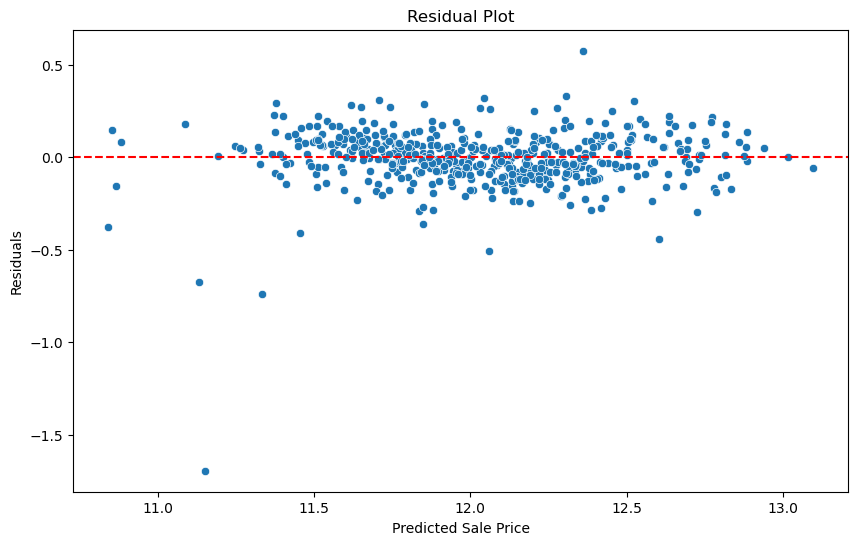

In [70]:
y_pred = lr.predict(X_test)
residuals = y_test - y_pred

# Create residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residual Plot');

In [71]:
metrics.mean_squared_error(y_test,y_pred)

0.0224611845989233

In [72]:
# Find the outlier
outlier_index = residuals[residuals <= -1.5].index

# Display details of this data point
outlier_data = X_test.loc[outlier_index]
outlier_target = y_test.loc[outlier_index]
outlier_pred = y_pred[outlier_index]
outlier_residuals = residuals[outlier_index]

print("Outlier Index:", outlier_index)
print("Outlier Feature Values:\n", outlier_data)
print("Actual Log Sale Price:", outlier_target.values)
print("Predicted Log Sale Price:", outlier_pred)
print("Residuals:", outlier_residuals)

Outlier Index: Index([182], dtype='int64', name='Id')
Outlier Feature Values:
      year_remod/add  exter_qual  exter_cond  bsmt_qual  bsmt_exposure  \
Id                                                                      
182            1970           3           2        2.0            1.0   

     total_bsmt_sf  gr_liv_area  fireplaces  fireplace_qu  garage_qual  ...  \
Id                                                                      ...   
182          678.0          832           1           4.0          2.0  ...   

     garage_finish_none  garage_finish_rfn  garage_finish_unf  has_porch  \
Id                                                                         
182                   0                  0                  1          0   

     garage_capacity  age  years_since_remod  total_quality  log_gr_liv_area  \
Id                                                                             
182           1560.0   87                 47              4         6.7238

In [73]:
lr.fit(X,y)
preds = lr.predict(df_test_filtered)
predictions = df_test_filtered.copy()
# change those logs back to actual housing prices
predictions['saleprice'] = np.exp(preds)
predictions = predictions[['saleprice']]
predictions.head()

,saleprice
Id,
2658,115311.133115
2718,163653.964185
2414,201743.298577
1989,108253.318648
625,170823.468597


Text(0, 0.5, 'Frequency')

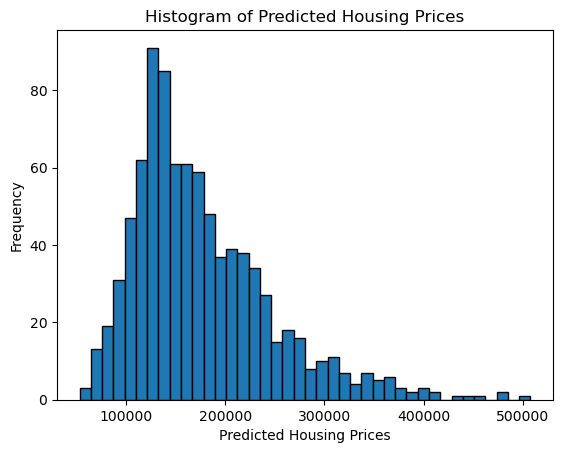

In [74]:
plt.hist(predictions['saleprice'],
        bins = 40,
        edgecolor = 'black');
plt.title('Histogram of Predicted Housing Prices')
plt.xlabel('Predicted Housing Prices')
plt.ylabel('Frequency')

In [75]:
np.mean(predictions['saleprice'])

176373.12721255465

In [76]:
predictions.to_csv('filtered_data_predictions_2.csv')
# there was a filtered predictions 1 but I accidentally dropped garage condition and quality instead of garage area and garage cars so I needed to fix that. 
# I also made the age column by subtracting from 2024. I do not think this matters overly much but it should be from when the housing data was collected which, was 2010

## Model 2

Let's make a prediction for the Square footage of each house

In [77]:
df_train_filtered['house_sf'] = ((df_train_filtered['gr_liv_area'] * df_train_filtered['house_style_1.5fin'])+
                                (df_train_filtered['gr_liv_area'] *df['House Style_1Story']) + 
                                (df_train_filtered['gr_liv_area']* df_train_filtered['house_style_1.5unf']) + 
                                (df_train_filtered['gr_liv_area']* df_train_filtered['house_style_2.5fin']) +
                                (df_train_filtered['gr_liv_area']* df_train_filtered['house_style_2.5unf']) +
                                (df_train_filtered['gr_liv_area']* df_train_filtered['house_style_2story']) +
                                (df_train_filtered['gr_liv_area']* df_train_filtered['house_style_sfoyer']) + 
                                (df_train_filtered['gr_liv_area']* df_train_filtered['house_style_slvl']))
df_test_filtered['house_sf'] = ((df_test_filtered['gr_liv_area'] * df_test_filtered['house_style_1.5fin'])+
                                (df_test_filtered['gr_liv_area'] * test['House Style_1Story']) + 
                                (df_test_filtered['gr_liv_area']* df_test_filtered['house_style_1.5unf']) + 
                                (df_test_filtered['gr_liv_area']* df_test_filtered['house_style_2.5fin']) +
                                (df_test_filtered['gr_liv_area']* df_test_filtered['house_style_2.5unf']) +
                                (df_test_filtered['gr_liv_area']* df_test_filtered['house_style_2story']) +
                                (df_test_filtered['gr_liv_area']* df_test_filtered['house_style_sfoyer']) + 
                                (df_test_filtered['gr_liv_area']* df_test_filtered['house_style_slvl']))

# overwrite from previous model because the math that was being done was how many years it took to remodel the house after being built which does not mean much
df_train_filtered['years_since_remod'] = 2010 - df_train_filtered['year_remod/add']
df_test_filtered['years_since_remod'] = 2010 - df_test_filtered['year_remod/add']

df_train_filtered['total_garage_quality'] = df_train_filtered['garage_cond'] * df_train_filtered['garage_qual']
df_test_filtered['total_garage_quality'] = df_test_filtered['garage_cond'] * df_test_filtered['garage_qual']

df_train_filtered['total_exter_quality'] = df_train_filtered['exter_cond'] * df_train_filtered['exter_qual']
df_test_filtered['total_exter_quality'] = df_test_filtered['exter_cond'] * df_test_filtered['exter_qual']

df_train_filtered['total_basement_quality'] = df_train_filtered['bsmt_qual'] * df['Bsmt Cond']
df_test_filtered['total_basement_quality'] = df_test_filtered['bsmt_qual'] * test['Bsmt Cond']

columns_to_drop = [
    'gr_liv_area', # since I have house_sf
    'year_remod/add', # since I have years_since_remod
    'garage_cond', 'garage_qual', # since I have total_garage_quality
    'exter_qual','exter_cond',# since I have total_exter_quality
    'house_style_1.5fin','house_style_2.5fin','house_style_2.5unf','house_style_2story','house_style_sfoyer','house_style_slvl','house_style_1.5unf',
    'bsmt_qual'] 

df_train_filtered = df_train_filtered.drop(columns=columns_to_drop)
df_test_filtered = df_test_filtered.drop(columns=columns_to_drop)

# These were made in the previous model and I need to take them out
df_test_filtered.drop(columns = 'log_gr_liv_area', inplace = True)
df_test_filtered.drop(columns = 'log_total_bsmt_sf', inplace = True)

df_train_filtered_dropped = df_train_filtered.drop(index=182,inplace= True)

In [78]:
X = df_train_filtered.drop(columns = 'saleprice')
y = df_train_filtered['saleprice']

X['house_sf'] = np.log(X['house_sf'] + 1)
X['total_bsmt_sf'] = np.log(X['total_bsmt_sf'] + 1)  # +1 to handle zeros
X['wood_deck_sf'] = np.log(X['wood_deck_sf'] + 1)  # +1 to handle zeros
X['open_porch_sf'] = np.log(X['open_porch_sf'] + 1)  # +1 to handle zeros
X['garage_capacity'] = np.log(X['garage_capacity'] + 1)

df_test_filtered['house_sf'] = np.log(df_test_filtered['house_sf'] + 1)
df_test_filtered['garage_capacity'] = np.log(df_test_filtered['garage_capacity'] + 1)
df_test_filtered['total_bsmt_sf'] = np.log(df_test_filtered['total_bsmt_sf'] + 1)  # +1 to handle zeros
df_test_filtered['wood_deck_sf'] = np.log(df_test_filtered['wood_deck_sf'] + 1)  # +1 to handle zeros
df_test_filtered['open_porch_sf'] = np.log(df_test_filtered['open_porch_sf'] + 1)  # +1 to handle zeros

y = np.log(df_train_filtered['saleprice']) # transforming prices into a percent

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)
lr = LinearRegression()
lr.fit(X_train,y_train)

print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.8943695175902362
0.9047668936514709


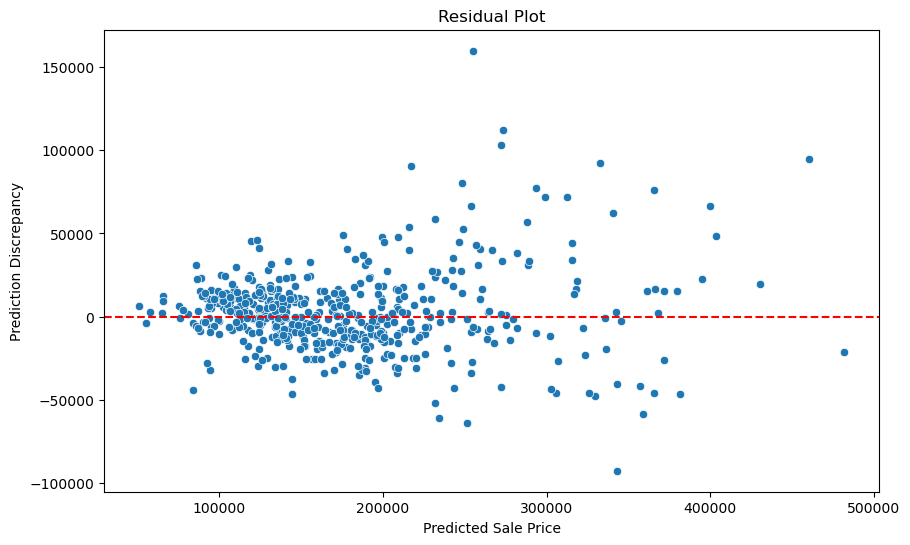

In [79]:
y_test = np.exp(y_test)

y_pred = lr.predict(X_test)
y_pred = np.exp(y_pred)
residuals = y_test - y_pred

# Create residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Prediction Discrepancy')
plt.title('Residual Plot');

plt.savefig('Residual Plot')

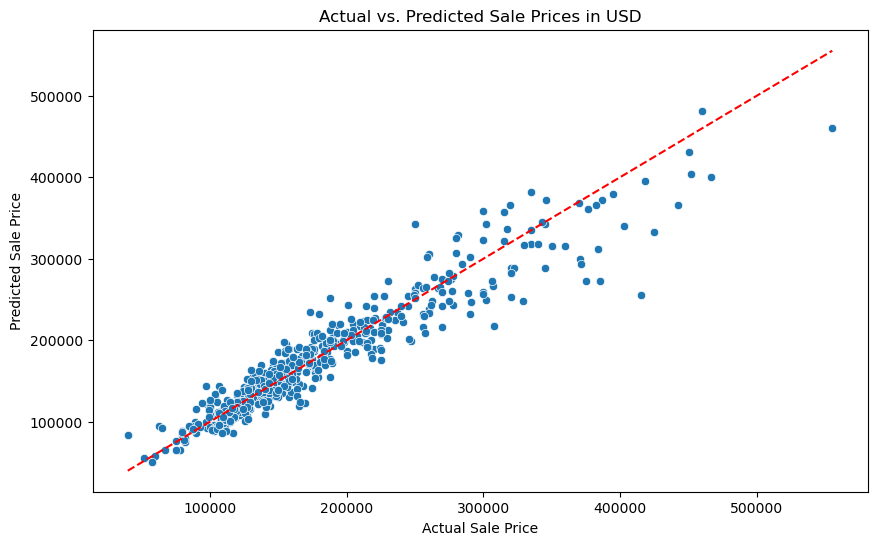

In [80]:
# Scatter plot of Actual vs. Predicted Sale Prices with adjusted limits
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)

# Calc min max values for actual and predicted for the line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

# Make the 45 degree line
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label="45-degree line")

plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Prices in USD');

plt.savefig('Actual vs Predicted Sale Prices in USD')

In [81]:
# Select a few random sample indices from the test set
sample_indices = X_test.sample(10, random_state=42).index

# Extract sample data for actual values and features
sample_X = X_test.loc[sample_indices]
sample_y_actual = y_test.loc[sample_indices]

# Predict sale prices for these samples and convert back to original scale
sample_y_pred_log = lr.predict(sample_X)
sample_y_pred = np.exp(sample_y_pred_log)

# Calculate percentage error
percentage_error = ((sample_y_pred - sample_y_actual) / sample_y_actual) * 100

# Create a DataFrame to display the results
sample_results = pd.DataFrame({
    'House Square Footage': np.exp(sample_X['house_sf']),  # Convert log-transformed features if needed
    'Garage Capacity': np.exp(sample_X['garage_capacity']),
    'Total Basement SF': np.exp(sample_X['total_bsmt_sf']),
    'Age of House': sample_X['age'],
    'Years since Remodel': sample_X['years_since_remod'],
    'Actual Sale Price': sample_y_actual,
    'Predicted Sale Price': sample_y_pred,
    'Percentage Error': percentage_error
})

# Display the table
print(sample_results)

      House Square Footage  Garage Capacity  Total Basement SF  Age of House  \
Id                                                                             
740                 1302.0            881.0             1146.0            86   
1815                1576.0           1059.0             1576.0            18   
164                 1386.0           1441.0              911.0            58   
1581                1652.0           1233.0             1607.0            24   
987                 1288.0            881.0              625.0            18   
1937                1361.0           1145.0              385.0            55   
2651                1377.0            217.0              739.0           105   
432                 2297.0           2527.0             1723.0             2   
917                 1478.0            217.0              862.0            82   
2031                1819.0            241.0             1041.0            79   

      Years since Remodel  Actual Sale 

In [82]:
coefficients = lr.coef_
feature_names = X_train.columns

coef_dict = {feature: coef for feature, coef in zip(feature_names, coefficients)}

coef_df = pd.DataFrame(coef_dict.items(), columns=['Feature', 'Coefficient'])
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df)

                   Feature  Coefficient
16    neighborhood_grnhill     0.632470
54                house_sf     0.423047
46      garage_finish_none     0.397555
31    neighborhood_stonebr     0.181003
25    neighborhood_nridght     0.169056
24    neighborhood_noridge     0.072807
12    neighborhood_crawfor     0.059446
10    neighborhood_clearcr     0.054645
38      bsmtfin_type_1_glq     0.051204
50         garage_capacity     0.037297
30    neighborhood_somerst     0.037197
39      garage_type_attchd     0.030448
32     neighborhood_timber     0.026162
0            bsmt_exposure     0.025471
1            total_bsmt_sf     0.021868
2               fireplaces     0.019791
43      garage_type_detchd     0.017317
55    total_garage_quality     0.014507
3             fireplace_qu     0.009471
56     total_exter_quality     0.008656
53           total_quality     0.008570
5            open_porch_sf     0.002898
15     neighborhood_greens     0.002132
4             wood_deck_sf     0.001977


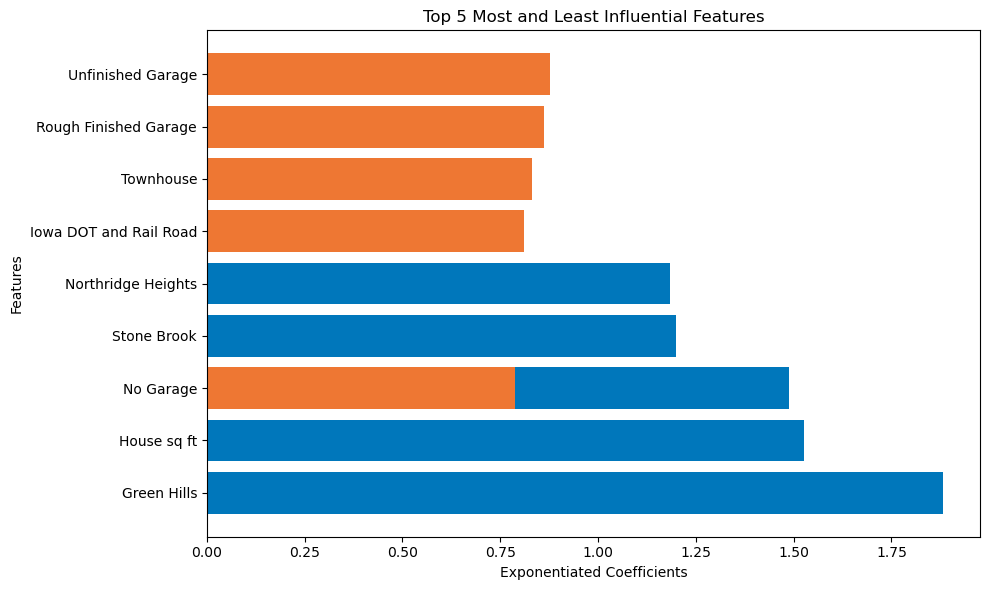

In [83]:
# Get top 5 features with the largest positive coefficients
top_positive = coef_df.nlargest(5, 'Coefficient')

# Get top 5 features with the largest negative coefficients
top_negative = coef_df.nsmallest(5, 'Coefficient')
top_positive['Exponentiated Coefficient'] = np.exp(top_positive['Coefficient'])
top_negative['Exponentiated Coefficient'] = np.exp(top_negative['Coefficient'])


selected_features = pd.concat([top_positive, top_negative])
selected_features['Feature'] = selected_features['Feature'].replace({
    'neighborhood_grnhill': 'Green Hills',
    'house_sf': 'House sq ft',
    'garage_finish_none': 'No Garage',
    'neighborhood_stonebr': 'Stone Brook',
    'neighborhood_nridght': 'Northridge Heights',
    'garage_finish_unf': 'Unfinished Garage',
    'garage_finish_rfn': 'Rough Finished Garage',
    'bldg_type_twnhs': 'Townhouse',
    'garage_type_none': 'No Garage',
    'neighborhood_idotrr': 'Iowa DOT and Rail Road'
})

# Create color mapping
colors = []

# Store the original feature names before replacement for comparison
original_top_positive = top_positive.index
original_top_negative = top_negative.index

for name in selected_features.index:
    if name in original_top_positive:
        colors.append('#0077BB')  # blue is positive, colors from chatgpt
    elif name in original_top_negative:
        colors.append('#EE7733')  # orange is negative


# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(selected_features['Feature'],
         selected_features['Exponentiated Coefficient'],
         color=colors)

# Set plot title and labels
plt.title('Top 5 Most and Least Influential Features')
plt.xlabel('Exponentiated Coefficients')
plt.ylabel('Features')
plt.tight_layout();

# Save the plot
plt.savefig('Top 5 Most and Least Influential Features')

In [84]:
metrics.mean_squared_error(y_test,y_pred)

611684891.5828432

In [85]:
lr.fit(X,y)
preds = lr.predict(df_test_filtered)
predictions = df_test_filtered.copy()
# change those logs back to actual housing prices
predictions['saleprice'] = np.exp(preds)
predictions = predictions[['saleprice']]
predictions.head()

,saleprice
Id,
2658,128676.394372
2718,160465.409007
2414,209355.140864
1989,106713.051387
625,168026.007385


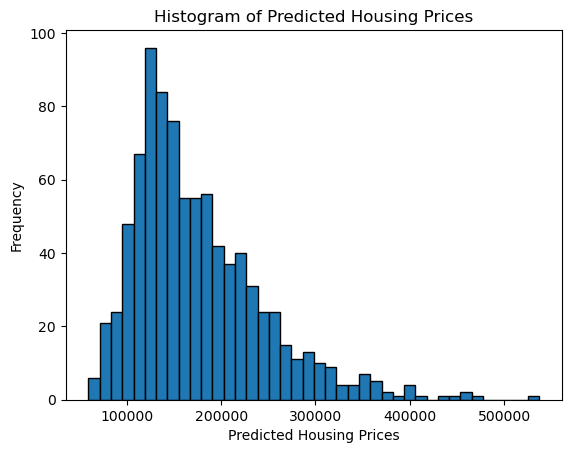

In [86]:
plt.hist(predictions['saleprice'],
        bins = 40,
        edgecolor = 'black')
plt.title('Histogram of Predicted Housing Prices')
plt.xlabel('Predicted Housing Prices')
plt.ylabel('Frequency');

plt.savefig('Histogram of Predicted Housing Prices')

In [87]:
np.mean(predictions['saleprice'])

175340.87773409777

In [88]:
predictions.to_csv('filtered_data_predictions_3.csv')

## Model 3

Dropping the outlier did nothing so lets put it back in and standard scaler the model and use Ridge

In [89]:
df_train_filtered = pd.concat([df_train_filtered, df_train_filtered_dropped])

In [90]:
X = df_train_filtered.drop(columns = 'saleprice')
y = df_train_filtered['saleprice']

X['house_sf'] = np.log(X['house_sf'] + 1)
X['total_bsmt_sf'] = np.log(X['total_bsmt_sf'] + 1)  # +1 to handle zeros
X['wood_deck_sf'] = np.log(X['wood_deck_sf'] + 1)  # +1 to handle zeros
X['open_porch_sf'] = np.log(X['open_porch_sf'] + 1)  # +1 to handle zeros
X['garage_capacity'] = np.log(X['garage_capacity'] + 1)

df_test_filtered['house_sf'] = np.log(df_test_filtered['house_sf'] + 1)
df_test_filtered['garage_capacity'] = np.log(df_test_filtered['garage_capacity'] + 1)
df_test_filtered['total_bsmt_sf'] = np.log(df_test_filtered['total_bsmt_sf'] + 1)  # +1 to handle zeros
df_test_filtered['wood_deck_sf'] = np.log(df_test_filtered['wood_deck_sf'] + 1)  # +1 to handle zeros
df_test_filtered['open_porch_sf'] = np.log(df_test_filtered['open_porch_sf'] + 1)  # +1 to handle zeros

y = np.log(df_train_filtered['saleprice']) # transforming prices into a percent

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)
lr = LinearRegression()
lr.fit(X_train,y_train)

print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.8943695175902362
0.9047668936514709


In [91]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.fit_transform(X_test)

r_alphas = np.logspace(0,5,100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas = r_alphas,
                  scoring = 'r2', # using r2 to determine what works best
                  cv = 5)# lets do 5 fold crossvalitaion

ridge_cv.fit(Z_train,y_train)
# Instantiate.
ridge_model = Ridge(alpha = ridge_cv.alpha_)

# Fit.
ridge_model.fit(Z_train,y_train)


# Evaluate model using R2.
print(ridge_model.score(Z_train,y_train))
print(ridge_model.score(Z_test,y_test))


0.8938174230747219
0.9033108458852773


C:\Users\graha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


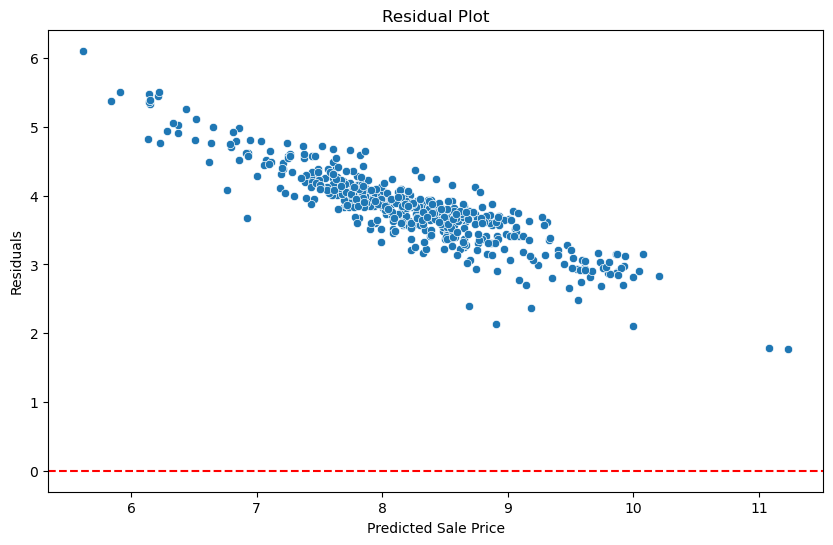

In [92]:
y_pred = lr.predict(Z_test)
residuals = y_test - y_pred

# Create residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residual Plot');

In [93]:
metrics.mean_squared_error(y_test,y_pred)

14.866885584489477

In [94]:
preds = ridge_model.predict(sc.transform(df_test_filtered))  # Use the same scaler on df_test_filtered
predictions = df_test_filtered.copy()
predictions['saleprice'] = np.exp(preds)  # Convert log-predictions back to the original scale
predictions = predictions[['saleprice']]
predictions.head()

,saleprice
Id,
2658,10457.654331
2718,12619.885256
2414,18625.356330
1989,10955.176735
625,14849.274098


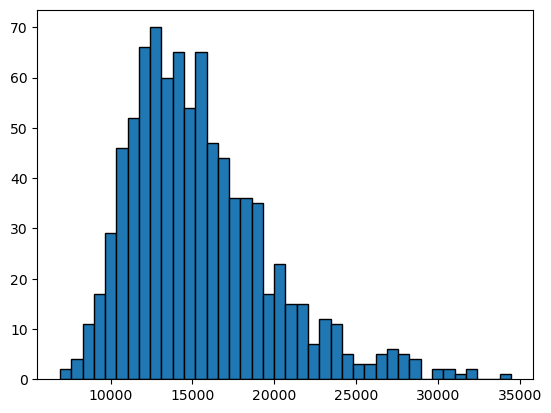

In [95]:
plt.hist(predictions['saleprice'],
        bins = 40,
        edgecolor = 'black');

In [96]:
predictions.to_csv('filtered_data_predictions_4.csv')
# # this was terrible a score on kaggle.

## Model 5

This helped me notice that both this model and the one labeled model 3 are just getting completely wrong predictions even though everything works fine above. The code is copy and pasted from model 2 and that works fine. Most likely its something with the varaibles being the same but don't have enough time to debug

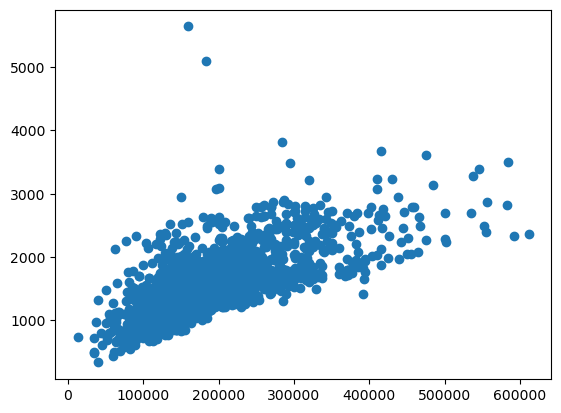

In [97]:
plt.scatter(df_train_filtered['saleprice'],
           df_train_filtered['house_sf']);

In [98]:
# filter out the two outliers for large surface area to saleprice
df_train_filtered = df_train_filtered[df_train_filtered['house_sf'] <= 4000]

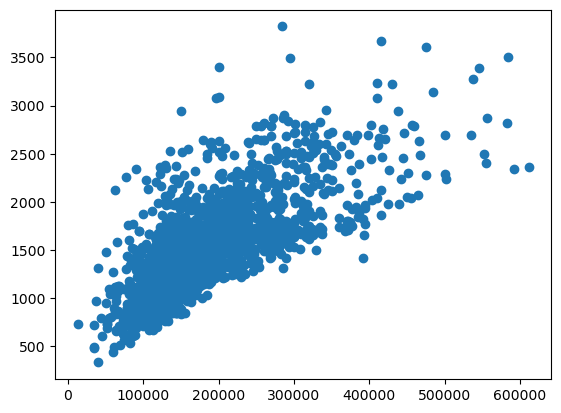

In [99]:
plt.scatter(df_train_filtered['saleprice'],
           df_train_filtered['house_sf']);

In [100]:
X = df_train_filtered.drop(columns = ['saleprice','garage_finish_none'])
y = df_train_filtered['saleprice']

X['house_sf'] = np.log(X['house_sf'] + 1)
X['total_bsmt_sf'] = np.log(X['total_bsmt_sf'] + 1)  # +1 to handle zeros
X['wood_deck_sf'] = np.log(X['wood_deck_sf'] + 1)  # +1 to handle zeros
X['open_porch_sf'] = np.log(X['open_porch_sf'] + 1)  # +1 to handle zeros
X['garage_capacity'] = np.log(X['garage_capacity'] + 1)

df_test_filtered['house_sf'] = np.log(df_test_filtered['house_sf'] + 1)
df_test_filtered['garage_capacity'] = np.log(df_test_filtered['garage_capacity'] + 1)
df_test_filtered['total_bsmt_sf'] = np.log(df_test_filtered['total_bsmt_sf'] + 1)  # +1 to handle zeros
df_test_filtered['wood_deck_sf'] = np.log(df_test_filtered['wood_deck_sf'] + 1)  # +1 to handle zeros
df_test_filtered['open_porch_sf'] = np.log(df_test_filtered['open_porch_sf'] + 1)  # +1 to handle zeros

df_test_filtered = df_test_filtered.drop(columns = 'garage_finish_none')

y = np.log(df_train_filtered['saleprice']) # transforming prices into a percent

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)
lr = LinearRegression()
lr.fit(X_train,y_train)

print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.9056309191524946
0.8996141150765721


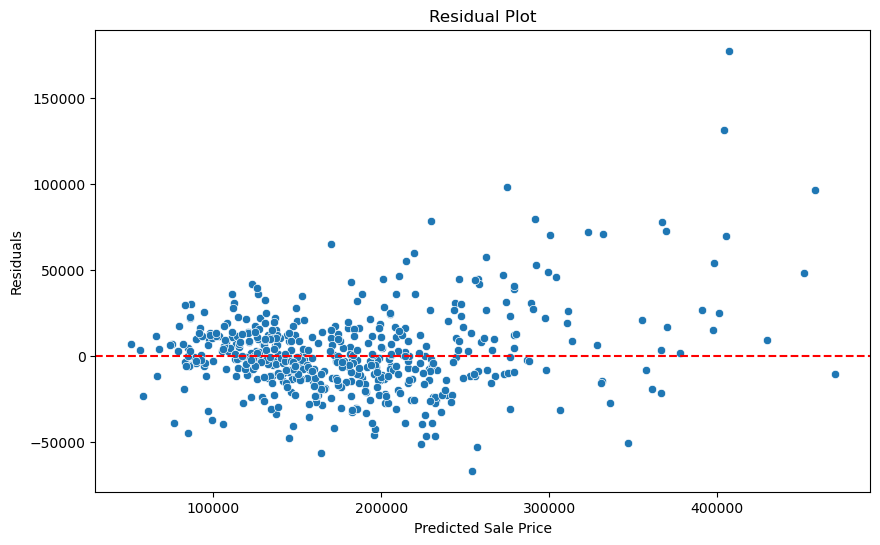

In [101]:
y_test = np.exp(y_test)

y_pred = lr.predict(X_test)
y_pred = np.exp(y_pred)
residuals = y_test - y_pred

# Create residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residual Plot');

In [102]:
lr.fit(X,y)
preds = lr.predict(df_test_filtered)
predictions = df_test_filtered.copy()
# change those logs back to actual housing prices
predictions['saleprice'] = np.exp(preds)
predictions = predictions[['saleprice']]
predictions.head()

,saleprice
Id,
2658,5484.066173
2718,6426.035194
2414,9693.764861
1989,5844.372894
625,7893.237343


In [103]:
metrics.mean_squared_error(y_test,y_pred)

603988597.1661727

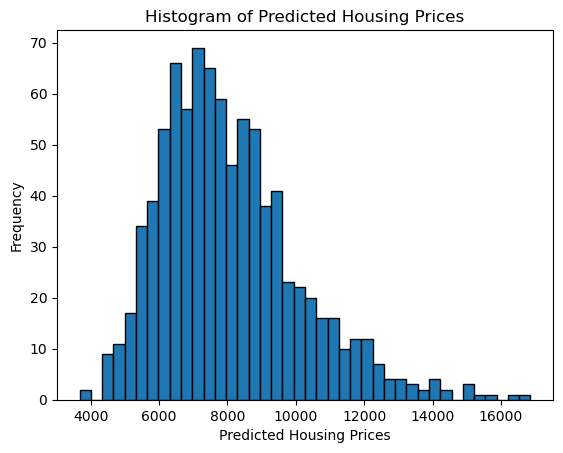

In [104]:
plt.hist(predictions['saleprice'],
        bins = 40,
        edgecolor = 'black')
plt.title('Histogram of Predicted Housing Prices')
plt.xlabel('Predicted Housing Prices')
plt.ylabel('Frequency');

In [105]:
np.mean(predictions['saleprice'])

8063.240398057942

In [106]:
predictions.to_csv('filtered_data_predictions_5.csv')

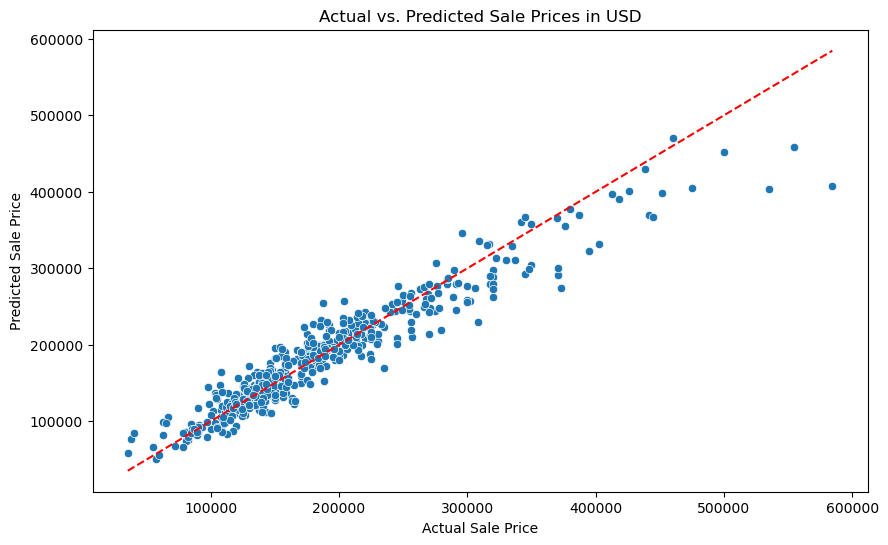

In [107]:
# Scatter plot of Actual vs. Predicted Sale Prices with adjusted limits
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)

# Calc min max values for actual and predicted for the line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

# Make the 45 degree line
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label="45-degree line")

plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Prices in USD');

In [108]:
# Select a few random sample indices from the test set
sample_indices = X_test.sample(10, random_state=42).index

# Extract sample data for actual values and features
sample_X = X_test.loc[sample_indices]
sample_y_actual = y_test.loc[sample_indices]

# Predict sale prices for these samples and convert back to original scale
sample_y_pred_log = lr.predict(sample_X)
sample_y_pred = np.exp(sample_y_pred_log)

# Calculate percentage error
percentage_error = ((sample_y_pred - sample_y_actual) / sample_y_actual) * 100

# Create a DataFrame to display the results
sample_results = pd.DataFrame({
    'House Square Footage': np.exp(sample_X['house_sf']),  # Convert log-transformed features if needed
    'Garage Capacity': np.exp(sample_X['garage_capacity']),
    'Total Basement SF': np.exp(sample_X['total_bsmt_sf']),
    'Age of House': sample_X['age'],
    'Years since Remodel': sample_X['years_since_remod'],
    'Actual Sale Price': sample_y_actual,
    'Predicted Sale Price': sample_y_pred,
    'Percentage Error': percentage_error
})

# Display the table
print(sample_results)

      House Square Footage  Garage Capacity  Total Basement SF  Age of House  \
Id                                                                             
172                  937.0              1.0              937.0            90   
568                 1225.0           1057.0              613.0             1   
1862                2621.0           1201.0             1362.0            33   
1832                1056.0           1085.0             1045.0            37   
336                  834.0            991.0              834.0            26   
392                 2120.0           1167.0              690.0            38   
2749                1912.0            943.0              778.0            17   
2790                1990.0           1173.0             1066.0             8   
2443                2393.0           2611.0             1397.0            13   
1386                1259.0            801.0             1199.0            41   

      Years since Remodel  Actual Sale 

In [109]:
coefficients = lr.coef_
feature_names = X_train.columns

coef_dict = {feature: coef for feature, coef in zip(feature_names, coefficients)}

coef_df = pd.DataFrame(coef_dict.items(), columns=['Feature', 'Coefficient'])
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
print(coef_df)

                   Feature  Coefficient
16    neighborhood_grnhill     0.631666
53                house_sf     0.438275
31    neighborhood_stonebr     0.161502
25    neighborhood_nridght     0.137320
12    neighborhood_crawfor     0.072784
38      bsmtfin_type_1_glq     0.059872
24    neighborhood_noridge     0.051537
49         garage_capacity     0.043482
10    neighborhood_clearcr     0.038499
2               fireplaces     0.037733
30    neighborhood_somerst     0.031034
39      garage_type_attchd     0.029884
0            bsmt_exposure     0.026412
1            total_bsmt_sf     0.022098
33    neighborhood_veenker     0.020079
43      garage_type_detchd     0.017334
15     neighborhood_greens     0.017170
54    total_garage_quality     0.012024
52           total_quality     0.008529
55     total_exter_quality     0.007955
3             fireplace_qu     0.003543
56  total_basement_quality     0.003001
22    neighborhood_npkvill     0.002849
4             wood_deck_sf     0.002457
